In [1]:
import pandas as pd
import numpy as np

from sklearn.cross_validation import train_test_split
from sklearn.ensemble import RandomForestClassifier
import matplotlib as plt
import seaborn as sns
%matplotlib inline



/Users/aoliya/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
df = pd.read_csv("data/Translation_Test/test_table.csv")

users =  pd.read_csv("data/Translation_Test/user_table.csv")


In [3]:
df.head(1)


,user_id,date,source,device,browser_language,ads_channel,browser,conversion,test
0,315281,2015-12-03,Direct,Web,ES,NaN,IE,1,0


In [4]:
df.isnull().sum()

user_id                  0
date                     0
source                   0
device                   0
browser_language         0
ads_channel         271444
browser                  0
conversion               0
test                     0
dtype: int64

In [5]:
users.head(1)

,user_id,sex,age,country
0,765821,M,20,Mexico


In [6]:
users.isnull().sum()

user_id    0
sex        0
age        0
country    0
dtype: int64

In [7]:
df = df.drop("ads_channel",axis=1)


In [8]:
print len(np.unique(df.user_id)) , len(np.unique(users.user_id))
print "dif:" ,len(np.unique(df.user_id)) - len(np.unique(users.user_id))

453321 452867
dif: 454


In [9]:
merge = pd.merge(df,users,on="user_id")

In [10]:
merge.head(1)

,user_id,date,source,device,browser_language,browser,conversion,test,sex,age,country
0,315281,2015-12-03,Direct,Web,ES,IE,1,0,M,32,Spain


In [11]:
len(np.unique(merge.user_id))


452867

In [12]:
merge.isnull().sum()

user_id             0
date                0
source              0
device              0
browser_language    0
browser             0
conversion          0
test                0
sex                 0
age                 0
country             0
dtype: int64

In [13]:
merge.describe()

,user_id,conversion,test,age
count,452867.000000,452867.000000,452867.000000,452867.000000
mean,499944.805166,0.049560,0.476462,27.130740
std,288676.264784,0.217034,0.499446,6.776678
min,1.000000,0.000000,0.000000,18.000000
25%,249819.000000,0.000000,0.000000,22.000000
50%,500019.000000,0.000000,0.000000,26.000000
75%,749543.000000,0.000000,1.000000,31.000000
max,1000000.000000,1.000000,1.000000,70.000000


In [14]:
merge.country.value_counts()

Mexico         128484
Colombia        54060
Spain           51782
Argentina       46733
Peru            33666
Venezuela       32054
Chile           19737
Ecuador         15895
Guatemala       15125
Bolivia         11124
Honduras         8568
El Salvador      8175
Paraguay         7347
Nicaragua        6723
Costa Rica       5309
Uruguay          4134
Panama           3951
Name: country, dtype: int64

In [15]:
merge[merge.test==0].groupby('country')[['conversion']].mean() #[['conversion']].plot()

,conversion
country,
Argentina,0.015071
Bolivia,0.049369
Chile,0.048107
Colombia,0.052089
Costa Rica,0.052256
Ecuador,0.049154
El Salvador,0.053554
Guatemala,0.050643
Honduras,0.050906


In [16]:
woSpaing = merge[merge.country!="Spain"]
woSpaing.describe()

,user_id,conversion,test,age
count,401085.000000,401085.000000,401085.000000,401085.00000
mean,499897.254966,0.045666,0.537976,27.12815
std,288720.866944,0.208760,0.498556,6.77476
min,1.000000,0.000000,0.000000,18.00000
25%,249811.000000,0.000000,0.000000,22.00000
50%,499980.000000,0.000000,1.000000,26.00000
75%,749596.000000,0.000000,1.000000,31.00000
max,1000000.000000,1.000000,1.000000,70.00000


In [17]:
import scipy.stats as stats


stats.ttest_ind(a= woSpaing[woSpaing.test==0].conversion,
                b= woSpaing[woSpaing.test==1].conversion,
                equal_var=False)    # Assume samples have equal variance?

Ttest_indResult(statistic=7.3538952030802767, pvalue=1.9289178577799033e-13)

In [135]:
woSpaing.groupby('test')[['conversion']].mean()

,conversion
test,
0,0.048292
1,0.043411


bad results let's investigate data trends

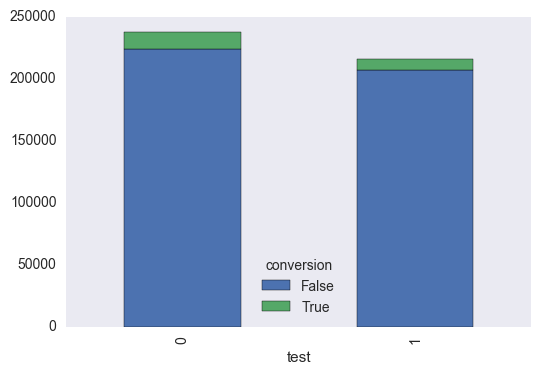

In [22]:
pd.crosstab(df.test, df.conversion.astype(bool)).plot(kind='bar', stacked=True, grid=False)

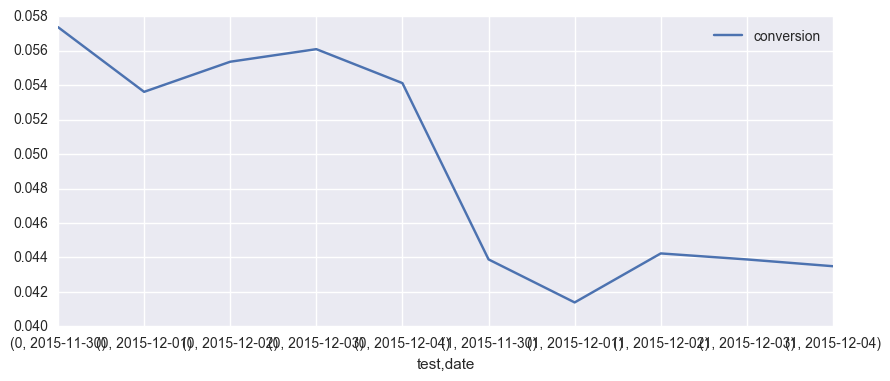

In [145]:
df.groupby(["test","date"])[["conversion"]].mean().plot(kind='line',figsize=(10,4))

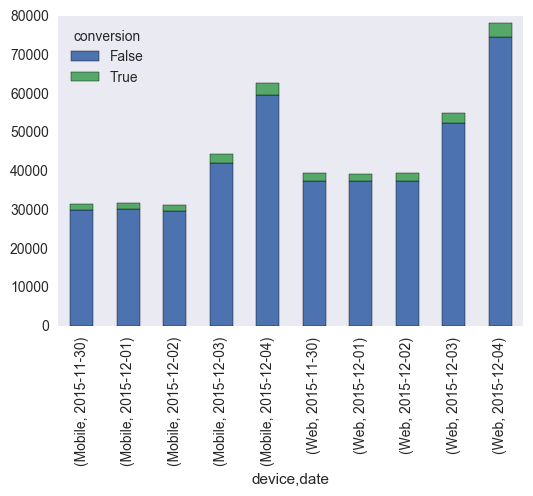

In [49]:
pd.crosstab([df.device,df.date], df.conversion.astype(bool)).plot(kind='bar', stacked=True, grid=False)


>> not enough data, experiment only ran for 5 days

test group constantly performing worse than control group. possibilities: 

1. not enough data: unlikely because variance between days is not that high
2. bias in control/test group

In [152]:
woSpaing.columns.values

array(['user_id', 'date', 'source', 'device', 'browser_language',
       'browser', 'conversion', 'test', 'sex', 'age', 'country'], dtype=object)

In [18]:
pd.get_dummies(woSpaing.drop(["date","user_id"],axis=1)).groupby('test').mean().head(1)


,conversion,age,source_Ads,source_Direct,source_SEO,device_Mobile,device_Web,browser_language_EN,browser_language_ES,browser_language_Other,...,country_El Salvador,country_Guatemala,country_Honduras,country_Mexico,country_Nicaragua,country_Panama,country_Paraguay,country_Peru,country_Uruguay,country_Venezuela
test,,,,,,,,,,,,,,,,,,,,,
0,0.048292,27.143186,0.401228,0.200949,0.397823,0.444388,0.555612,0.139101,0.83328,0.027618,...,0.022168,0.041131,0.023533,0.346493,0.01845,0.010609,0.019697,0.091031,0.002239,0.087145


In [19]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier()
tree.fit(pd.get_dummies(woSpaing.drop(["date","user_id","conversion"],axis=1)),woSpaing[["test"]])

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [25]:
from sklearn.tree import _tree

def tree_to_code(tree, feature_names):
    tree_ = tree.tree_
    feature_name = [
        feature_names[i] if i != _tree.TREE_UNDEFINED else "undefined!"
        for i in tree_.feature
    ]
    print "def tree({}):".format(", ".join(feature_names))

    def recurse(node, depth):
        indent = "  " * depth
        if tree_.feature[node] != _tree.TREE_UNDEFINED:
            name = feature_name[node]
            threshold = tree_.threshold[node]
            print "{}if {} <= {}:".format(indent, name, threshold)
            recurse(tree_.children_left[node], depth + 1)
            print "{}else:  # if {} > {}".format(indent, name, threshold)
            recurse(tree_.children_right[node], depth + 1)
        else:
            print "{}return {}".format(indent, tree_.value[node])

    recurse(0, 1)
    
    
def get_code(tree, feature_names):
        left      = tree.tree_.children_left
        right     = tree.tree_.children_right
        threshold = tree.tree_.threshold
        features  = [feature_names[i] for i in tree.tree_.feature]
        value = tree.tree_.value

        def recurse(left, right, threshold, features, node):
                if (threshold[node] != -2):
                        print "if ( " + features[node] + " <= " + str(threshold[node]) + " ) {"
                        if left[node] != -1:
                                recurse (left, right, threshold, features,left[node])
                        print "} else {"
                        if right[node] != -1:
                                recurse (left, right, threshold, features,right[node])
                        print "}"
                else:
                        print "return " + str(value[node])

        recurse(left, right, threshold, features, 0)

In [23]:
tree_to_code(tree,woSpaing.drop(["date","user_id","conversion"],axis=1).columns.values)

def tree(source, device, browser_language, browser, test, sex, age, country):
  if source <= 0.5:
    return [[ 185311.       0.]]
  else:  # if source > 0.5
    return [[      0.  215774.]]


In [27]:
get_code(tree,woSpaing.drop(["date","user_id","conversion"],axis=1).columns.values)

if ( source <= 0.5 ) {
return [[ 185311.       0.]]
} else {
return [[      0.  215774.]]
}
